# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane appear to have the lowest Tumor Volume among all drug regimens.
- They also have the least variance which is slightly surprising considering they were the two drug regimens with the highest number of total mice.
- The sex of the mice was split just shy of 50% each with the males receiving the extra 1% of the study.
- Infubinol was the only regimen, among the four we tested, that held an outlier.
- The single mouse we charted from the Capomulin regimen had a substancial decrease in the size of the tumor as the study progressed. 
- There does appear to be correlation between the weight of the mouse and the size of the tumor in the Capomulin regimen.
 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
health_df = pd.merge(study_results, mouse_metadata, how='left', on="Mouse ID")


# Display the data table for preview
health_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [91]:
# Checking the number of mice.
mouse_count = len(health_df['Mouse ID'].unique())
mouse_count

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = health_df['Mouse ID'][health_df.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_health_df = health_df[health_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates_health_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_health_df = health_df[health_df.iloc[:,0] != "g989"]
cleaned_health_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [93]:
#check new mouse count to make sure duplicate mouse was dropped
new_mouse_count = len(cleaned_health_df['Mouse ID'].unique())
new_mouse_count

248

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = cleaned_health_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_volume_median = cleaned_health_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_variance = cleaned_health_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_stdev = cleaned_health_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_sem = cleaned_health_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

drug_regimen_summary = pd.DataFrame({
    "Mean Tumor Volume": tumor_volume_mean,
    "Median Tumor Volume": tumor_volume_median,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_stdev,
    "Tumor Volume Std. Err.": tumor_volume_sem
    
})

drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

drug_regimen_summary_agg = cleaned_health_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

drug_regimen_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

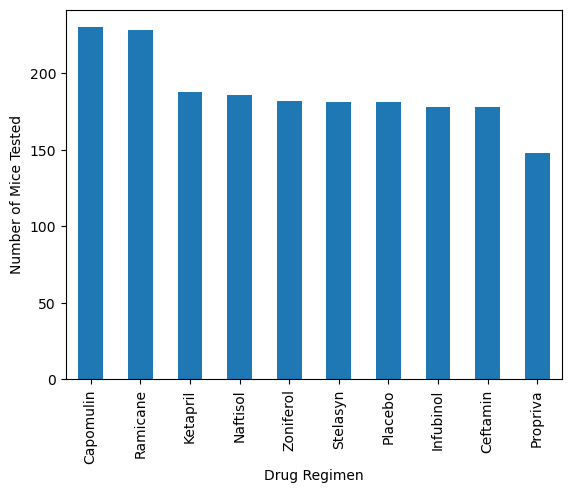

In [96]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_by_drug_regimen = cleaned_health_df['Drug Regimen'].value_counts()

timepoint_by_drug_regimen.plot(kind='bar', ylabel= 'Number of Mice Tested', xlabel= 'Drug Regimen')
plt.show()

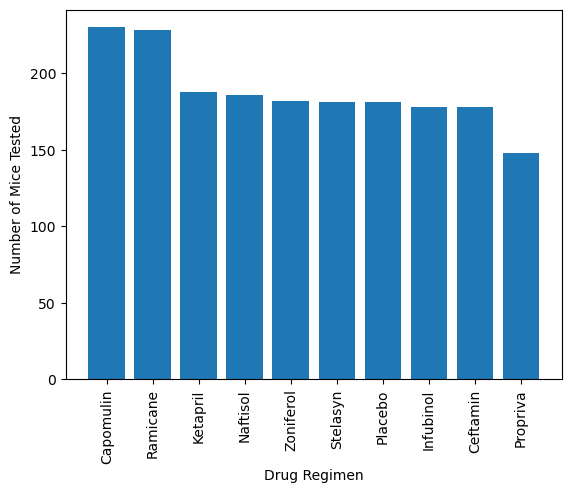

In [97]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(cleaned_health_df.groupby('Drug Regimen')))
y_axis = cleaned_health_df['Drug Regimen'].value_counts()

#set tick locations
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(tick_locations, y_axis.keys(), rotation='vertical')
plt.show()

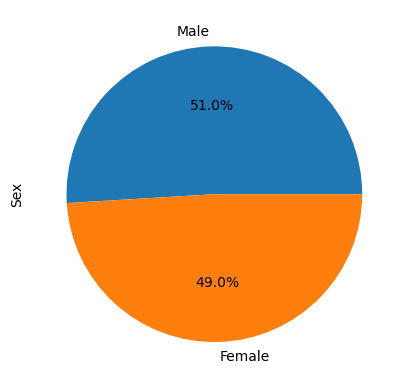

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_and_female_mice = cleaned_health_df['Sex'].value_counts()


male_and_female_mice.plot(kind='pie', autopct="%1.1f%%")
plt.show()

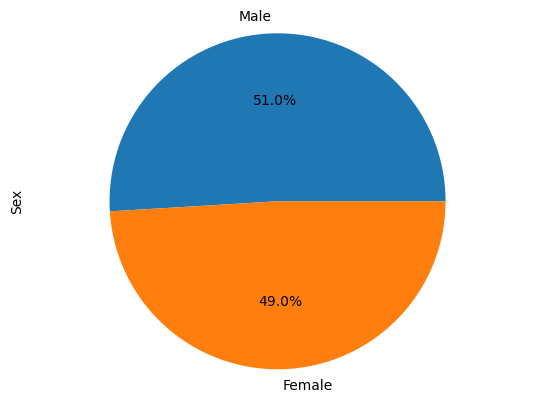

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = [cleaned_health_df['Sex'].unique()]
labels=['Male', 'Female']


plt.pie(cleaned_health_df['Sex'].value_counts(), labels=labels, autopct="%1.1f%%")
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = cleaned_health_df.groupby('Mouse ID')['Timepoint'].max()

last_timepoint_df = pd.DataFrame({'Last Timepoint': last_timepoint})

last_timepoint_df = last_timepoint_df.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_merge = pd.merge(last_timepoint_df, cleaned_health_df, how='inner', on="Mouse ID")
last_tumor_volumes = last_timepoint_merge.loc[(last_timepoint_merge['Last Timepoint'] == last_timepoint_merge['Timepoint']),]
last_tumor_volumes


,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,45,45,67.973419,2,Infubinol,Female,20,23
19,a251,45,45,65.525743,1,Infubinol,Female,21,25
29,a262,45,45,70.717621,4,Placebo,Female,17,29
39,a275,45,45,62.999356,3,Ceftamin,Female,20,28
46,a366,30,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...
1839,z435,10,10,48.710661,0,Propriva,Female,12,26
1849,z578,45,45,30.638696,0,Ramicane,Male,11,16
1859,z581,45,45,62.754451,3,Infubinol,Female,24,25
1869,z795,45,45,65.741070,3,Naftisol,Female,13,29


In [101]:
#list of treatments to call in for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#created dictionary with blank lists for each drug treatment type to append
tumor_volumes = {'Capomulin': [], 'Ramicane': [], 'Infubinol': [], 'Ceftamin': []}

#loop through merged DF and add final tumor volumes for each mouse to their respective treatment list in 
#tumor_volumes dictionary
for i in range(len(last_tumor_volumes)):
    Drug = last_tumor_volumes.iloc[i,5]
    Volume = last_tumor_volumes.iloc[i,3]
    if Drug == treatments[0]:
        tumor_volumes['Capomulin'].append(Volume)
    if Drug == treatments[1]:
        tumor_volumes['Ramicane'].append(Volume)
    if Drug == treatments[2]:
        tumor_volumes['Infubinol'].append(Volume)
    if Drug == treatments[3]:
        tumor_volumes['Ceftamin'].append(Volume)
        


#loop through treatment lists in tumor_volumes dictionary to calculate quartiles, bounds, and iqr and print results

for treatment, volume in tumor_volumes.items():
    quartiles = np.quantile(volume, [.25,.5,.75])
    lower = quartiles[0]
    upper = quartiles[2]
    iqr = upper - lower
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    print(f'The {treatment} IQR is {iqr}')
    print(f'The {treatment} upper bound is {upper_bound}')
    print(f'The {treatment} lower bound is {lower_bound}')
    print("-------------------------------------------")


The Capomulin IQR is 7.781863460000004
The Capomulin upper bound is 51.83201549
The Capomulin lower bound is 20.70456164999999
-------------------------------------------
The Ramicane IQR is 9.098536719999998
The Ramicane upper bound is 54.30681135
The Ramicane lower bound is 17.912664470000003
-------------------------------------------
The Infubinol IQR is 11.477135160000003
The Infubinol upper bound is 82.74144559000001
The Infubinol lower bound is 36.83290494999999
-------------------------------------------
The Ceftamin IQR is 15.577752179999997
The Ceftamin upper bound is 87.66645829999999
The Ceftamin lower bound is 25.355449580000002
-------------------------------------------


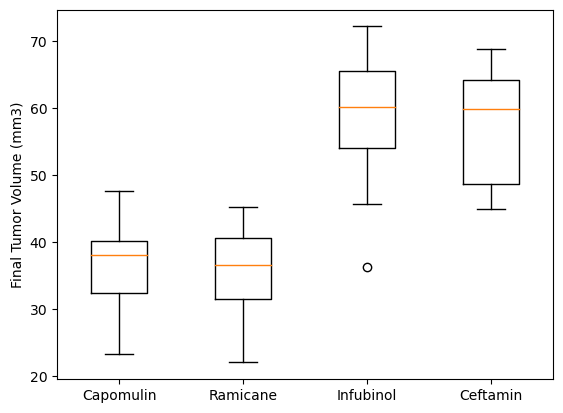

In [102]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_volumes.values(), labels=tumor_volumes.keys())
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

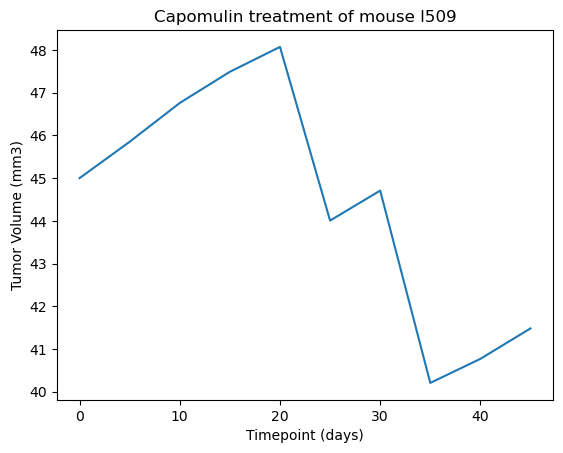

In [103]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#find mouse data
mouse = cleaned_health_df.loc[(cleaned_health_df['Drug Regimen'] == 'Capomulin')
                               & (cleaned_health_df['Mouse ID'] == 'l509'), :]


#set x and y axis for graph
x_axis = mouse['Timepoint']
y_axis = mouse['Tumor Volume (mm3)']

#plot graph
plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

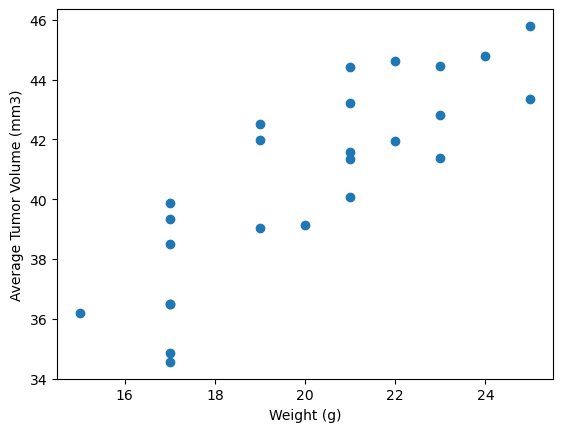

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#narrow dataframe to only Capomulin 
Capomulin_df = cleaned_health_df.loc[(cleaned_health_df['Drug Regimen'] == 'Capomulin'),:]

#set x and y axis for graph
x_axis = Capomulin_df.groupby('Mouse ID')['Weight (g)'].max()
y_axis = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#plot graph
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


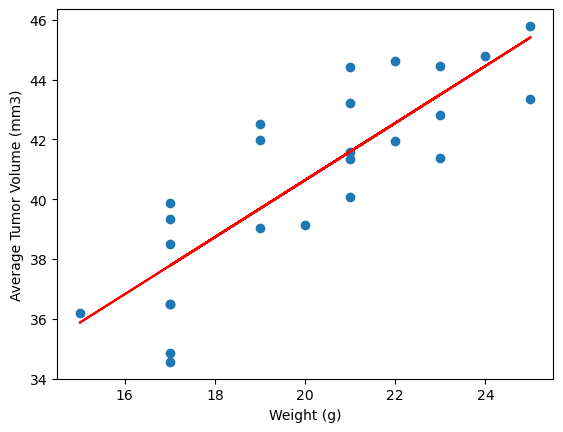

In [106]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_axis,y_axis)[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

